In [127]:
import pandas as pd
import numpy as np

# load the dataset

In [128]:


data = pd.read_csv('/content/heart.csv')




In [129]:
print(data.head(30))



    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1   3       145   233    1        0      150      0      2.3   
1    37    1   2       130   250    0        1      187      0      3.5   
2    41    0   1       130   204    0        0      172      0      1.4   
3    56    1   1       120   236    0        1      178      0      0.8   
4    57    0   0       120   354    0        1      163      1      0.6   
5    57    1   0       140   192    0        1      148      0      0.4   
6    56    0   1       140   294    0        0      153      0      1.3   
7    44    1   1       120   263    0        1      173      0      0.0   
8    52    1   2       172   199    1        1      162      0      0.5   
9    57    1   2       150   168    0        1      174      0      1.6   
10   54    1   0       140   239    0        1      160      0      1.2   
11   48    0   2       130   275    0        1      139      0      0.2   
12   49    1   1       13

In [197]:

shuffled_data = data.sample(frac=1).reset_index(drop=True)


In [198]:
target_categories = data.iloc[:, -1].value_counts()

In [199]:
print("Number of categories in the target variable")
print(len(target_categories))

Number of categories in the target variable
2


In [200]:
print("Number of categories in the target variable")
print(len(target_categories))


Number of categories in the target variable
2


# showing some statistics of teh dataset

In [201]:
print(data.describe())



                age           sex            cp      trestbps        chol  \
count  3.020000e+02  3.020000e+02  3.020000e+02  3.020000e+02  302.000000   
mean  -2.352791e-17  4.705581e-17 -7.058372e-17 -1.176395e-17    0.000000   
std    1.001660e+00  1.001660e+00  1.001660e+00  1.001660e+00    1.001660   
min   -2.814192e+00 -1.464866e+00 -9.352080e-01 -2.144521e+00   -2.332210   
25%   -7.107878e-01 -1.464866e+00 -9.352080e-01 -6.617119e-01   -0.687083   
50%    1.195033e-01  6.826561e-01  3.535150e-02 -9.140084e-02   -0.116127   
75%    7.283833e-01  6.826561e-01  1.005911e+00  4.789102e-01    0.546763   
max    2.499671e+00  6.826561e-01  1.976470e+00  3.900776e+00    6.145034   

                fbs       restecg     thalach         exang       oldpeak  \
count  3.020000e+02  3.020000e+02  302.000000  3.020000e+02  3.020000e+02   
mean   2.352791e-17 -1.176395e-17    0.000000 -7.058372e-17 -4.705581e-17   
std    1.001660e+00  1.001660e+00    1.001660  1.001660e+00  1.001660e+00  

# Checking for duplicates

In [202]:
duplicate = data[data.duplicated()]
duplicate



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# remove duplicates


In [203]:

data.drop_duplicates(inplace=True)

print(data)


          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.949794  0.682656  1.976470  0.764066 -0.261285  2.389793 -1.002541   
1   -1.928548  0.682656  1.005911 -0.091401  0.067741 -0.418446  0.901657   
2   -1.485726 -1.464866  0.035352 -0.091401 -0.822564 -0.418446 -1.002541   
3    0.174856  0.682656  0.035352 -0.661712 -0.203222 -0.418446  0.901657   
4    0.285561 -1.464866 -0.935208 -0.661712  2.080602 -0.418446  0.901657   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.285561 -1.464866 -0.935208  0.478910 -0.106449 -0.418446  0.901657   
299 -1.042904  0.682656  1.976470 -1.232023  0.338703 -0.418446  0.901657   
300  1.503322  0.682656 -0.935208  0.707035 -1.035462  2.389793  0.901657   
301  0.285561  0.682656 -0.935208 -0.091401 -2.235438 -0.418446  0.901657   
302  0.285561 -1.464866  0.035352 -0.091401 -0.203222 -0.418446 -1.002541   

      thalach     exang   oldpeak     slope        ca      thal    target  

# detecting if there is outliers

In [204]:

import matplotlib.pyplot as plt
import seaborn as sns



In [205]:

features = data.columns[:-1]

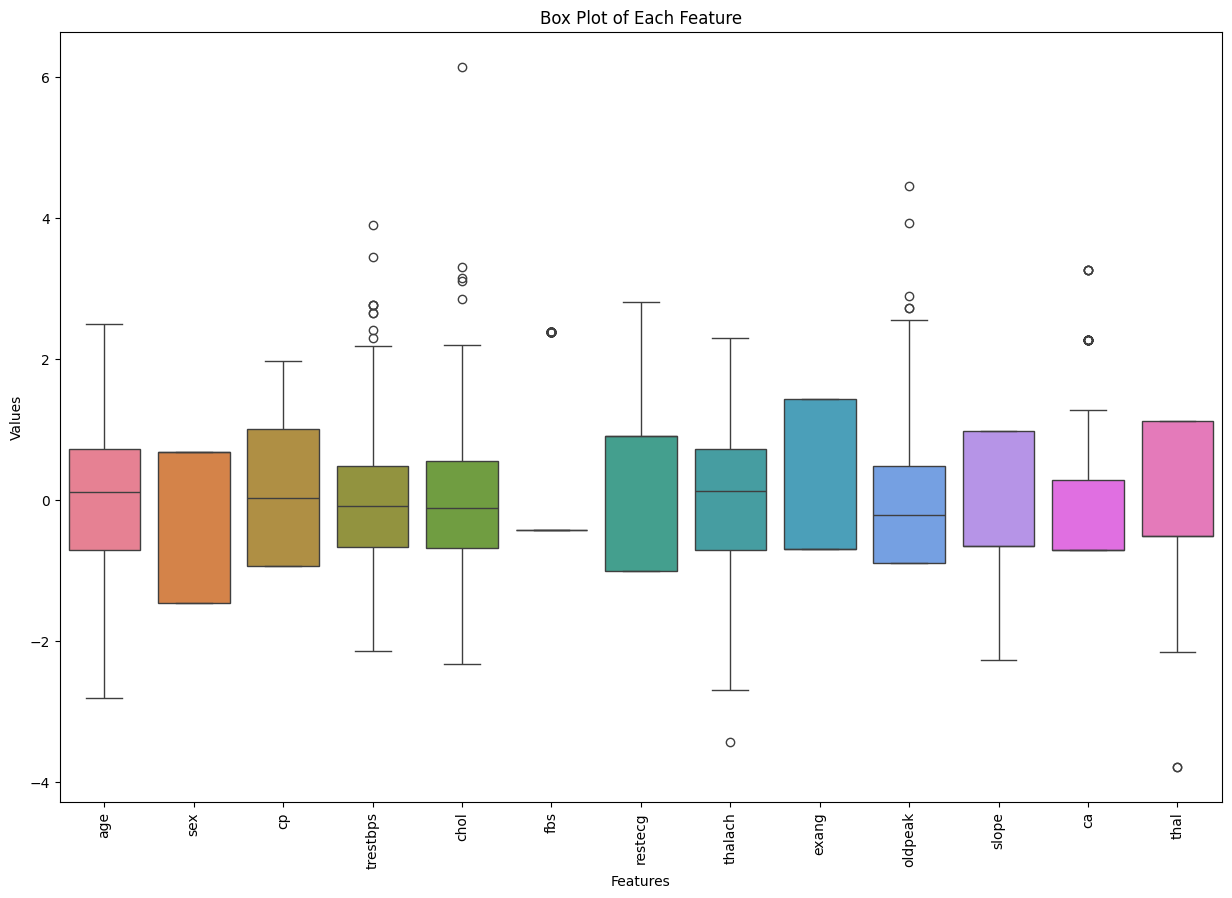

In [206]:


plt.figure(figsize=(15, 10))
sns.boxplot(data=data[features])
plt.title('Box Plot of Each Feature')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

# calculating and detecting nulls

In [207]:
print(data.isnull().sum())



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [208]:
print(data.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object


In [209]:
from sklearn.preprocessing import StandardScaler


# Identifying the categorical variables in the dataset

In [210]:

categorical_vars = data.select_dtypes(include=['object']).columns




This code performs one-hot encoding for the categorical variables
# that i identified in the previous step in the code. It first create dummy variables for each category in each categorical variable.

In [211]:
data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)



# this  line perform normalization using a StandardScaler  and identify the column names of all numerical variables.

In [212]:
scaler = StandardScaler()
numerical_variables = data.select_dtypes(include=['int64', 'float64']).columns



In [213]:
data[numerical_variables] = scaler.fit_transform(data[numerical_variables])



In [214]:

# here i defined the sigmoid function as the main function
def sigmoid(z):
    # then i calculated the sigmoid of z
    return 1 / (1 + np.exp(-z))



In [215]:
# here is the definintion of the cost function for the  logistic taking X,y,theta as paramters
def compute_costfun_logist(X, y, theta):
    # here i am defining the number of training examples as the lenght of y
    m = len(y)
    # h is hypothesis function that we will use using sigmoid
    h = sigmoid(np.dot(X, theta))
    # cost variable is calculating the cost for using logistic
    cost = -(1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    return cost



In [216]:

# this function is the gradient descent function for logistic regression that will be taking x,theta,y,aplha,number of iterations
def gradient_descent_forlogist(X, y, theta, alpha, num_iterations):
    m = len(y)
    # i am intializing a list to store the cost at each iteration
    cost_hist = []
   #this for loop will loop number of itrations to calculate h the gradient then lastly update the paramter against the gradient
    for i in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        # to update the parameters (theta)
        theta -= alpha * gradient
        # calc and store the cost for the current iteration
        cost = compute_costfun_logist(X, y, theta)
        cost_hist.append(cost)

    return theta, cost_hist


In [217]:

# Define prediction function
def predict(X, theta):
    #  the probabilities will be calculated using the sigmoid function
    probabilities = sigmoid(np.dot(X, theta))
    # then we convert the probabilities to binary outputs (0 or 1) based on threshold of 0.5 that we put
    return (probabilities >= 0.5).astype(int)

In [218]:
def augmention(X):
    augm = np.ones((X.shape[0], 1))
    return np.concatenate((augm, X), axis=1)


In [219]:
#split the data into features and target
X = data.drop('target', axis=1)
y = data['target']



In [220]:
#here we are splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
X_train = augmention(X_train)
X_test = augmention(X_test)

In [222]:
theta = np.zeros(X_train.shape[1])


In [223]:

alpha = 0.01
num_iterations = 150000

In [224]:
theta, cost_history = gradient_descent_forlogist(X_train, y_train, theta, alpha, num_iterations)


<ipython-input-215-1bf2add4da71>:8: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
<ipython-input-214-ed74c5b6d68f>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-215-1bf2add4da71>:8: RuntimeWarning: invalid value encountered in scalar add
  cost = -(1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))


In [225]:
y_pred = predict(X_test, theta)



<ipython-input-214-ed74c5b6d68f>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [226]:
#when i tried to calcuate the accuracy an error message showed  that there is a mismatch between the data types of the target variable (y_test) and the predicted values (y_pred).
# thats because  y_test  contains continuous values while y_pred contains binary values.
#so i tried to make them all binary so its the same type

In [227]:
y_pred_binary = (y_pred > 0.5).astype(int)


In [228]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [229]:
print(type(y_pred_binary))

<class 'numpy.ndarray'>


In [230]:
y_test_binary = (y_test > 0.5).astype(int)

In [231]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# evalutaing the results using accuracy score, precision score, recall score, f1score

In [232]:
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.7705
Precision: 0.9500
Recall: 0.5938
F1 Score: 0.7308


# summary

In [196]:
#to me the model implementation from scratch was not easy and required me to pay careful attention to detail, especially the numerical stability and convergence issues.
#choosing  hyperparameters such as the learning rate and number of iterations was sooo important
#for getting satisfactory model performrnce after alot of trials
#the data Cleaning process was sp effictive as the  data was the most important factor
#cuz all the model is depending on the data so quality by handling missing values, outliers, and
#data type inconsistencies somehow was a challenge during the preprocessing stage.
#but i normalized the dataset and converted the data so the model has a stable data to work with.
#finally the performace metrices was a powerful indicator for me to understand the full picture and evalute the model.
